In [1]:
!pip uninstall tweepy -y
!pip install tweepy==4.10.0
!pip install vaderSentiment

Found existing installation: tweepy 3.10.0
Uninstalling tweepy-3.10.0:
  Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 584 kB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 11.

In [2]:
import os
import re
import sys
import time
import tweepy
import json
import datetime 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
from collections import Counter
from tweepy import OAuthHandler
from wordcloud import WordCloud
from matplotlib.lines import Line2D
from IPython.display import clear_output
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
uploaded = files.upload()

Saving Login.csv to Login.csv


In [4]:
log = pd.read_csv('Login.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]
bearer_token = log['key'][4]
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit=True)

In [80]:
#Mexico woeid = 23424900
#CDMX woeid = 116545
#US woeid = 23424977
#NewYork woeid = 2459115
#London woeid = 44418
#World woeid = 1

woeid = 1
trend_name_lst = []
trend_count_lst = []

trends = api.get_place_trends(id = woeid)
for value in trends:
    for trend in value['trends']:
        trend_name_lst.append(trend['name'])
        trend_count_lst.append(trend['tweet_volume'])

df_trend = pd.DataFrame(trend_name_lst, columns=['trend'])
df_trend['count'] = trend_count_lst
df_trend['date'] = datetime.date.today()
df_trend.to_excel('trend.xlsx')
df_trend_asc = df_trend.sort_values("count", ascending=False)
df_trend_asc

,trend,count,date
5,jungkook,941283.0,2022-05-28
7,stranger things,590363.0,2022-05-28
16,Brown,144003.0,2022-05-28
17,Fajardo,141612.0,2022-05-28
9,Boston,98179.0,2022-05-28
1,#Ivete50,94252.0,2022-05-28
8,#DebateFinal,86115.0,2022-05-28
0,Jimmy Butler,83635.0,2022-05-28
2,Game 7,75281.0,2022-05-28
3,Game 7,75281.0,2022-05-28


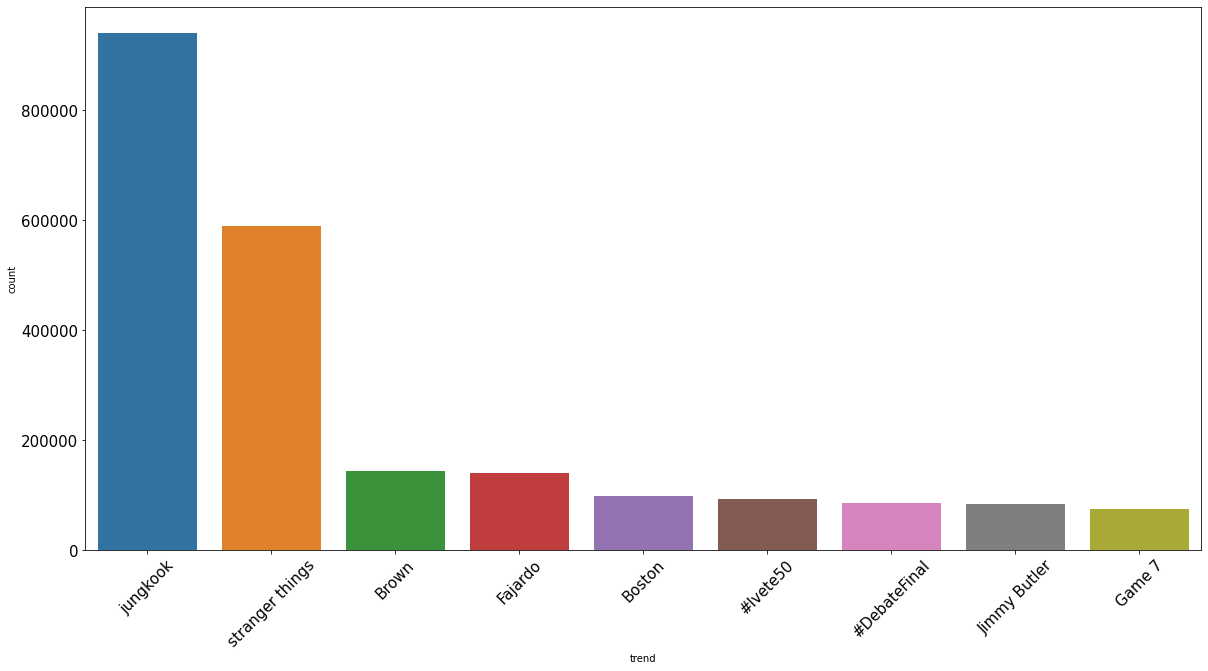

In [81]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x = 'trend', y = 'count', data = df_trend_asc[0:10])
plt.xticks(rotation = 45)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [6]:
date_lst = []
count_lst = []
start_lst = ['2022-01-01T00:00:00Z', '2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z']
end_lst = ['2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z', '2022-05-27T00:00:00Z']
query = 'Amber Heard -is:retweet' #place_country:US, OR, has:media, lang:en

for i in range(0,len(start_lst)):

  counts = client.get_all_tweets_count(query = query, start_time = start_lst[i], end_time = end_lst[i], granularity='day')

  for count in counts.data:

    count_lst.append(count['tweet_count'])
    d = dateutil.parser.parse(str(count['start']))
    date_lst.append(d.strftime('%m/%d/%Y'))

df_count = pd.DataFrame(date_lst, columns=['Day'])
df_count['Count'] = count_lst
df_count

,Day,Count
0,01/01/2022,254
1,01/02/2022,248
2,01/03/2022,280
3,01/04/2022,361
4,01/05/2022,401
...,...,...
141,05/22/2022,18174
142,05/23/2022,25374
143,05/24/2022,25676
144,05/25/2022,28665


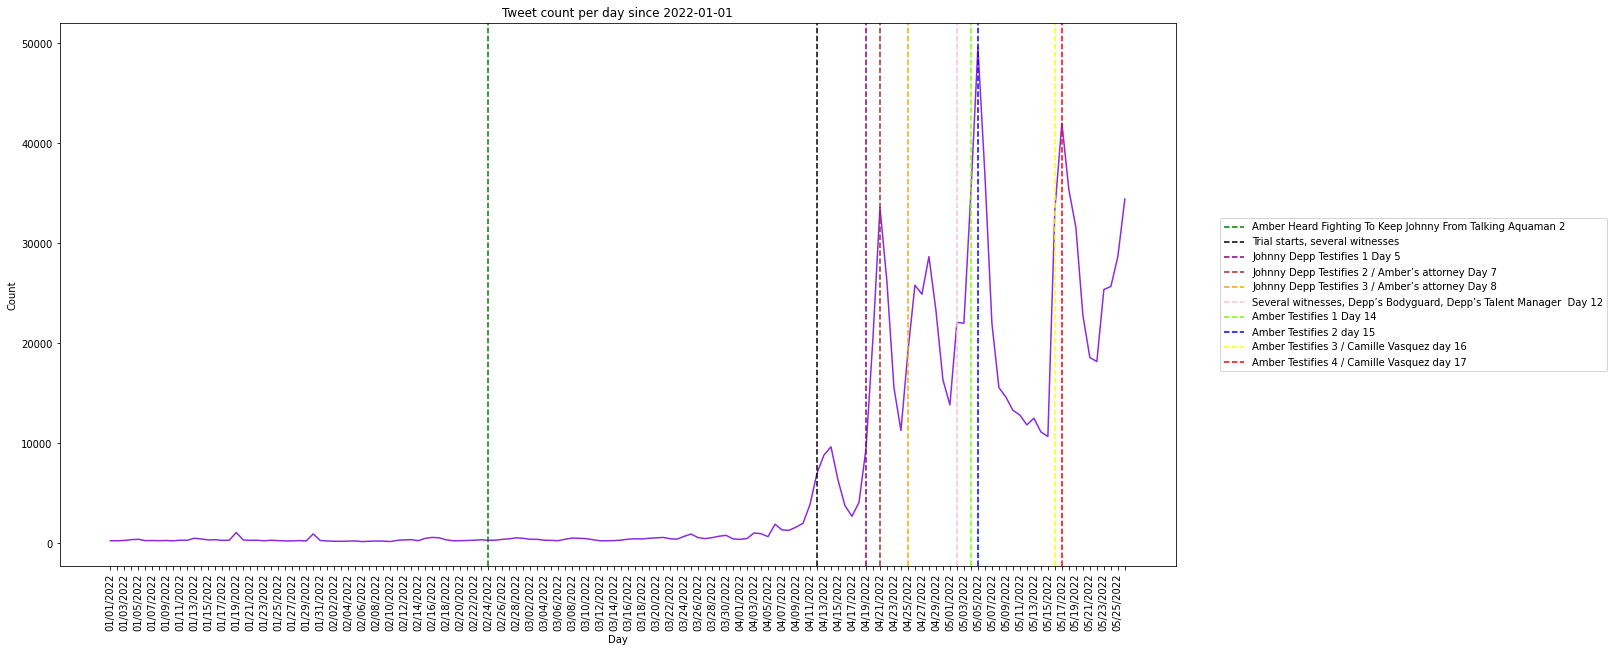

In [7]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(x = "Day", y = "Count", data = df_count, color = 'blueviolet').set_title("Tweet count per day since 2022-01-01")
plt.tick_params(axis = 'x', labelrotation = 90)
ax.axvline('02/24/2022', color = 'green', ls='--', label='Amber Heard Fighting To Keep Johnny From Talking Aquaman 2')
ax.axvline('04/12/2022', color = 'black', ls='--', label='Trial starts, several witnesses')
ax.axvline('04/19/2022', color = 'purple', ls='--', label='Johnny Depp Testifies 1 Day 5')
ax.axvline('04/21/2022', color = 'brown', ls='--', label='Johnny Depp Testifies 2 / Amber’s attorney Day 7')
ax.axvline('04/25/2022', color = 'orange', ls='--', label='Johnny Depp Testifies 3 / Amber’s attorney Day 8')
ax.axvline('05/02/2022', color = 'pink', ls='--', label='Several witnesses, Depp’s Bodyguard, Depp’s Talent Manager  Day 12')
ax.axvline('05/04/2022', color = 'lawngreen', ls='--', label='Amber Testifies 1 Day 14')
ax.axvline('05/05/2022', color = 'blue', ls='--', label='Amber Testifies 2 day 15')
ax.axvline('05/16/2022', color = 'yellow', ls='--', label='Amber Testifies 3 / Camille Vasquez day 16')
ax.axvline('05/17/2022', color = 'red', ls='--', label = 'Amber Testifies 4 / Camille Vasquez day 17')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

In [8]:
start_date_lst = pd.date_range(start="2022-01-01",end="2022-05-26").to_pydatetime().tolist()
end_date_lst = pd.date_range(start="2022-01-02",end="2022-05-27").to_pydatetime().tolist()
start_date_conv = []
end_date_conv = []

for date in start_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  start_date_conv.append(dateconv)

for date in end_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  end_date_conv.append(dateconv)

tweet_lst = []
tweet_date =[]
tweet_query = 'Amber Heard -is:retweet lang:en'

for i in range(0,len(start_date_conv)):

  response = client.search_all_tweets(query = tweet_query, tweet_fields=['created_at'], start_time = start_date_conv[i], end_time = end_date_conv[i], max_results = 500)
  time.sleep(1.0)

  for tweet in response.data:

    tweet_lst.append([tweet.text])
    tweet_date.append(tweet.created_at.strftime('%m/%d/%Y'))
    
df_tweet = pd.DataFrame(tweet_lst, columns=['tweet'])
df_tweet['date']=tweet_date
df_tweet

,tweet,date
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022
...,...,...
55171,@KyDUIGuy Eckhardt knew Amber personally when ...,05/26/2022
55172,"@TimRunsHisMouth Discussing toxic people, such...",05/26/2022
55173,6.\nEvil In Plain Sight\nEerily Similar\nAccus...,05/26/2022
55174,@ElizaDFTW Amber Heard’s edited photos were no...,05/26/2022


In [64]:
hashtag_lst = []

for tweet in df_tweet['tweet']:
  hashtag = re.findall(r"#(\w+)", tweet)
  hashtag_lst.append(hashtag)

hashtag_lst_clean =  list(filter(lambda x: x, hashtag_lst))

hashtag_list2 = []

for l in hashtag_lst_clean :
    for str in l:
      hashtag_list2.append(str)

hashtag_dict = Counter(hashtag_list2)
df_hashtags = pd.DataFrame(list(hashtag_dict.items()), columns = ['Hashtag','Counts'])
df_hashtags_asc = df_hashtags.sort_values("Counts", ascending=False)
df_hashtags_asc

,Hashtag,Counts
7,JusticeForJohnnyDepp,3033
13,JohnnyDepp,1407
12,AmberHeard,1387
15,AmberHeardIsAnAbuser,1054
14,AmberHeardIsALiar,978
...,...,...
1722,luffy,1
1723,FANART,1
1724,アイビスペイントX,1
1725,ワンピース,1


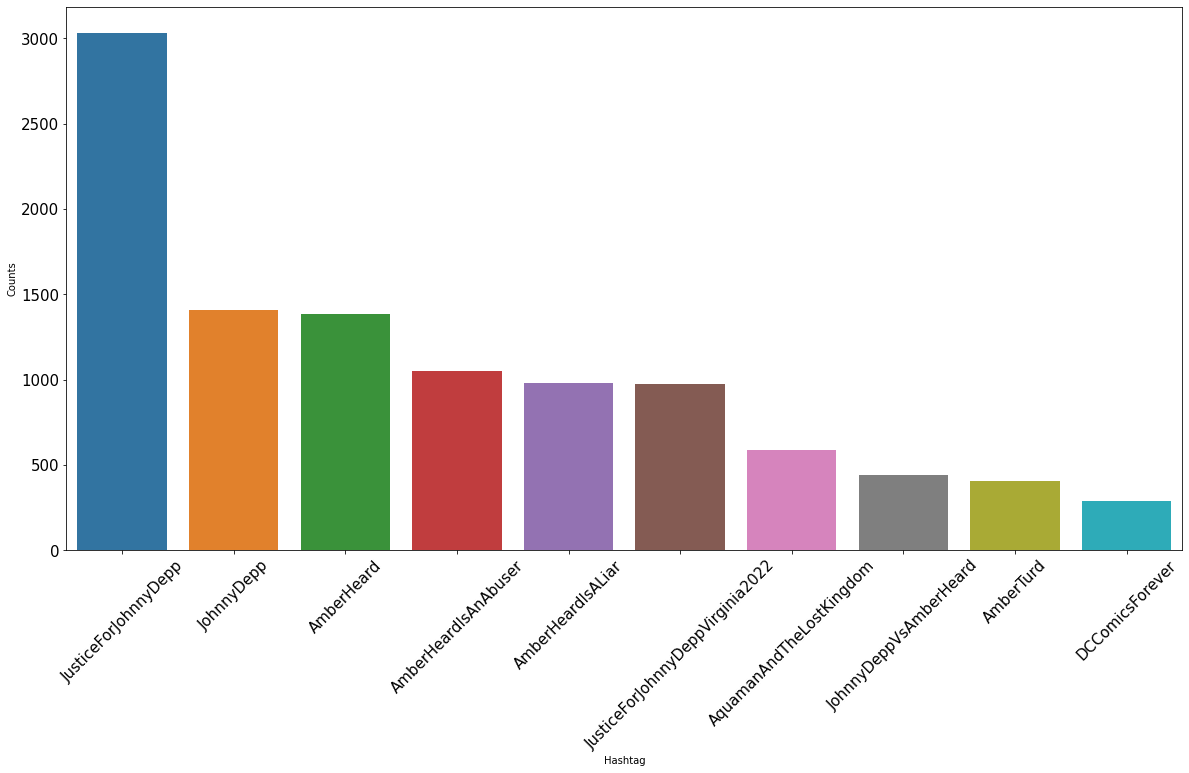

In [76]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(x = 'Hashtag', y = 'Counts', data = df_hashtags_asc[0:10])
plt.xticks(rotation = 45)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [ ]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt)
  twt = re.sub(r'[^A-Za-z ]', ' ', twt)  
  twt = re.sub(r'#', ' ', twt) 
  twt = re.sub(r'RT[\s]+', ' ', twt) 
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'https', ' ', twt)
  twt = re.sub(r'http', ' ', twt)
  twt = re.sub(r'http?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'_', ' ', twt) 
  twt = re.sub(r'-', ' ', twt) 
  twt = re.sub(r'\n', ' ', twt) 
  twt = re.sub(r'&amp', ' ', twt) 

  return twt


df_tweet['cleaned_tweet'] = df_tweet['tweet'].apply(cleanTwt)
df_tweet

,tweet,date,cleaned_tweet
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...
...,...,...,...
55199,Lil Kim did a year which means sadly they won’...,05/26/2022,Lil Kim did a year which means sadly they won ...
55200,@wcbs880 I'm confident he will leave you alone...,05/26/2022,I m confident he will leave you alone if you...
55201,@An_elf_pirate So it sounds like someone compa...,05/26/2022,elf pirate So it sounds like someone compare...
55202,Johnny Depp's lawyer shoots Amber Heard - 'Lie...,05/26/2022,Johnny Depp s lawyer shoots Amber Heard Lie...


In [ ]:
def getPolarity(text):
  
  sid = SentimentIntensityAnalyzer()

  return sid.polarity_scores(text)


df_tweet['tweet_sentiment'] = df_tweet['cleaned_tweet'].apply(getPolarity)
df_tweet.head()

,tweet,date,cleaned_tweet,tweet_sentiment
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp..."
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou..."
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp..."


In [ ]:
df_tweet['compound'] = df_tweet['tweet_sentiment'].apply(lambda score_dict: score_dict['compound'])
df_tweet['sentiment_type']=''
df_tweet.loc[df_tweet.compound>0,'sentiment_type']='POSITIVE'
df_tweet.loc[df_tweet.compound==0,'sentiment_type']='NEUTRAL'
df_tweet.loc[df_tweet.compound<0,'sentiment_type']='NEGATIVE'
df_tweet

,tweet,date,cleaned_tweet,tweet_sentiment,compound,sentiment_type
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,POSITIVE
1,I saw Amber HeArd in a gay pub a few weeks ago...,01/01/2022,I saw Amber HeArd in a gay pub a few weeks ago...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.3612,POSITIVE
2,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou...",-0.3182,NEGATIVE
3,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,NEGATIVE
4,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.6705,POSITIVE
...,...,...,...,...,...,...
55199,Lil Kim did a year which means sadly they won’...,05/26/2022,Lil Kim did a year which means sadly they won ...,"{'neg': 0.115, 'neu': 0.716, 'pos': 0.169, 'co...",0.5106,POSITIVE
55200,@wcbs880 I'm confident he will leave you alone...,05/26/2022,I m confident he will leave you alone if you...,"{'neg': 0.115, 'neu': 0.776, 'pos': 0.109, 'co...",0.1779,POSITIVE
55201,@An_elf_pirate So it sounds like someone compa...,05/26/2022,elf pirate So it sounds like someone compare...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.4144,POSITIVE
55202,Johnny Depp's lawyer shoots Amber Heard - 'Lie...,05/26/2022,Johnny Depp s lawyer shoots Amber Heard Lie...,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE


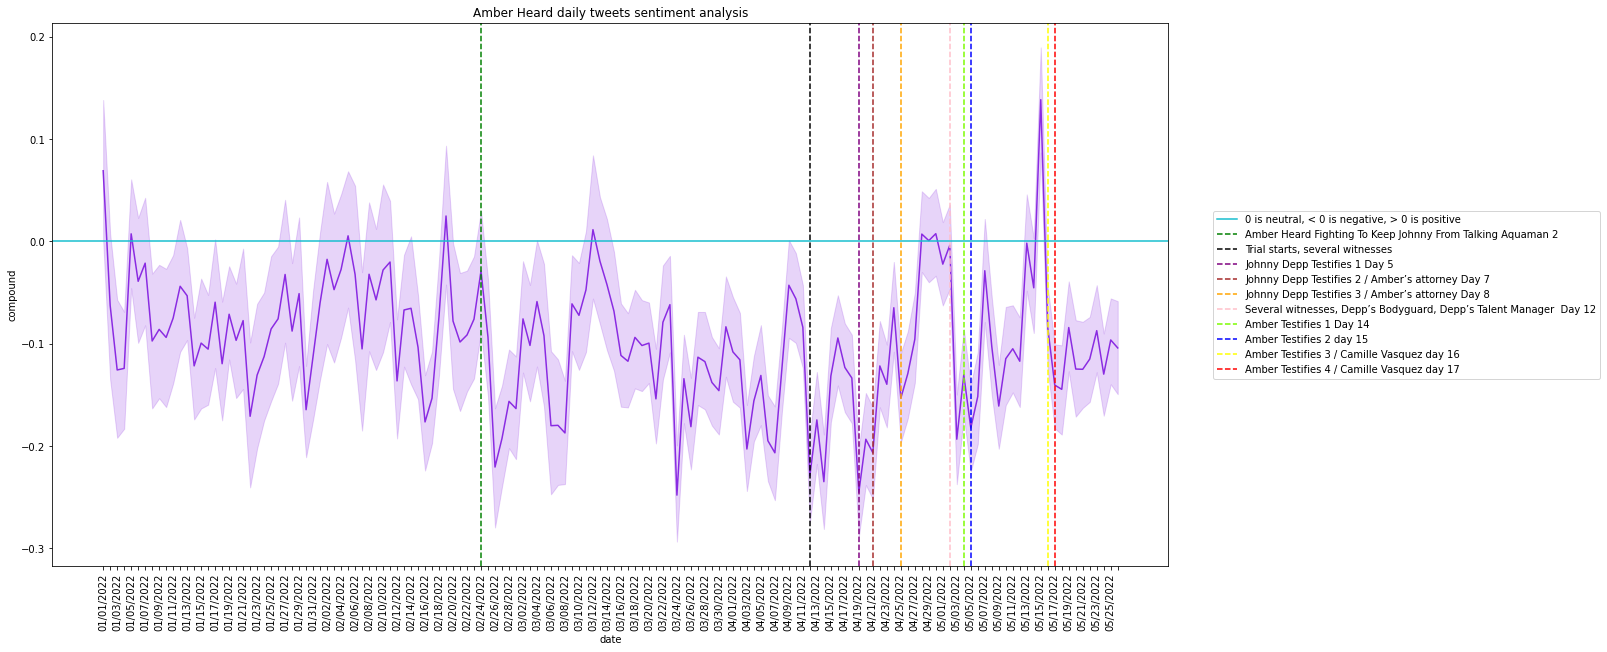

In [ ]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet', estimator='mean', err_style="band", ci=95).set_title("Amber Heard daily tweets sentiment analysis")
ax.axhline(0, color = 'tab:cyan', label='0 is neutral, < 0 is negative, > 0 is positive')
ax.axvline('02/24/2022', color = 'green', ls='--', label='Amber Heard Fighting To Keep Johnny From Talking Aquaman 2')
ax.axvline('04/12/2022', color = 'black', ls='--', label='Trial starts, several witnesses')
ax.axvline('04/19/2022', color = 'purple', ls='--', label='Johnny Depp Testifies 1 Day 5')
ax.axvline('04/21/2022', color = 'brown', ls='--', label='Johnny Depp Testifies 2 / Amber’s attorney Day 7')
ax.axvline('04/25/2022', color = 'orange', ls='--', label='Johnny Depp Testifies 3 / Amber’s attorney Day 8')
ax.axvline('05/02/2022', color = 'pink', ls='--', label='Several witnesses, Depp’s Bodyguard, Depp’s Talent Manager  Day 12')
ax.axvline('05/04/2022', color = 'lawngreen', ls='--', label='Amber Testifies 1 Day 14')
ax.axvline('05/05/2022', color = 'blue', ls='--', label='Amber Testifies 2 day 15')
ax.axvline('05/16/2022', color = 'yellow', ls='--', label='Amber Testifies 3 / Camille Vasquez day 16')
ax.axvline('05/17/2022', color = 'red', ls='--', label = 'Amber Testifies 4 / Camille Vasquez day 17')
plt.tick_params(axis = 'x', labelrotation = 90)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

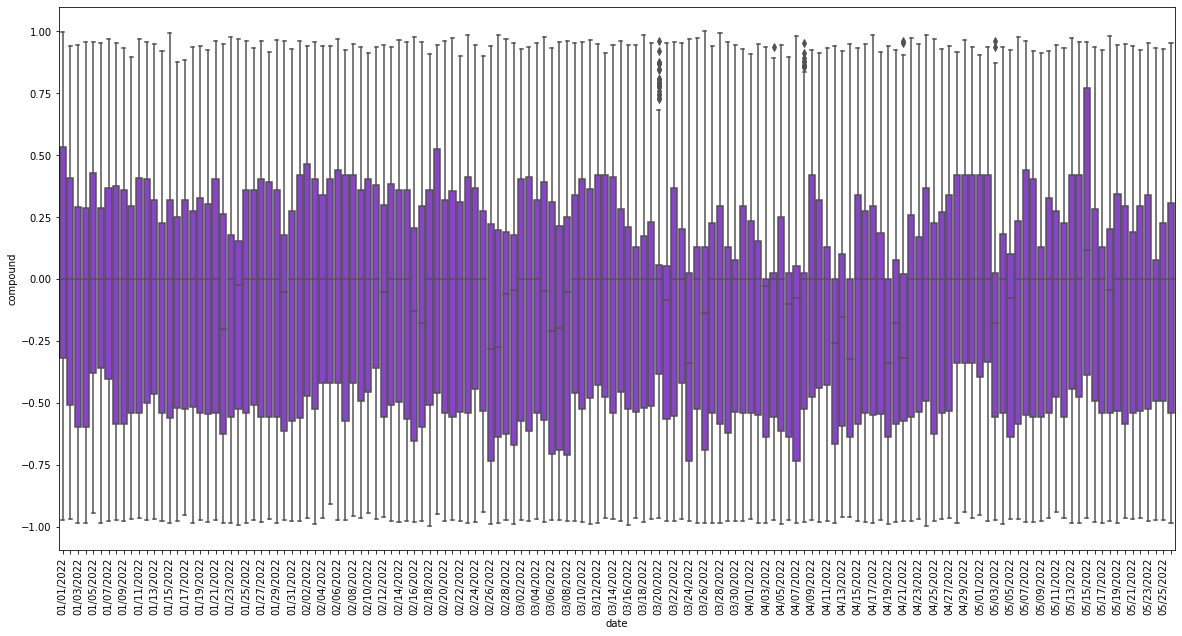

In [ ]:
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet').set_title("")
plt.tick_params(axis = 'x', labelrotation = 90)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

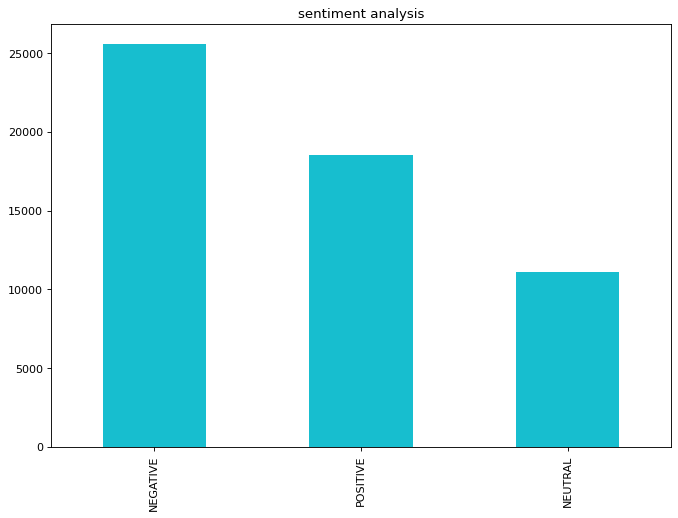

In [ ]:
plt.figure(figsize=(10, 7), dpi= 80)
df_tweet.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = 'tab:cyan')

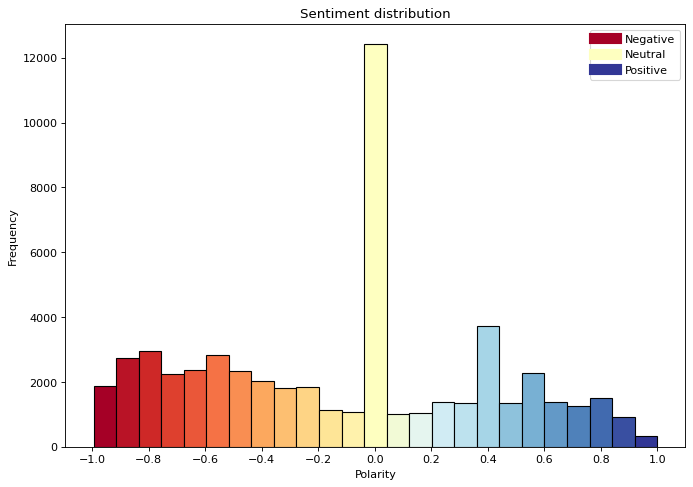

In [ ]:
plt.figure(figsize=(10, 7), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(df_tweet['compound'], 25, edgecolor='black', linewidth=1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment distribution')
plt.xlabel('Polarity')
plt.xticks(np.arange(-1.0, 1.1, step=0.2))
plt.ylabel('Frequency')

custom_lines = [Line2D([0], [0], color=cm(0.), lw=10),
                Line2D([0], [0], color=cm(.5), lw=10),
                Line2D([0], [0], color=cm(1.), lw=10)]

plt.legend(custom_lines, ['Negative', 'Neutral', 'Positive'])
plt.show()

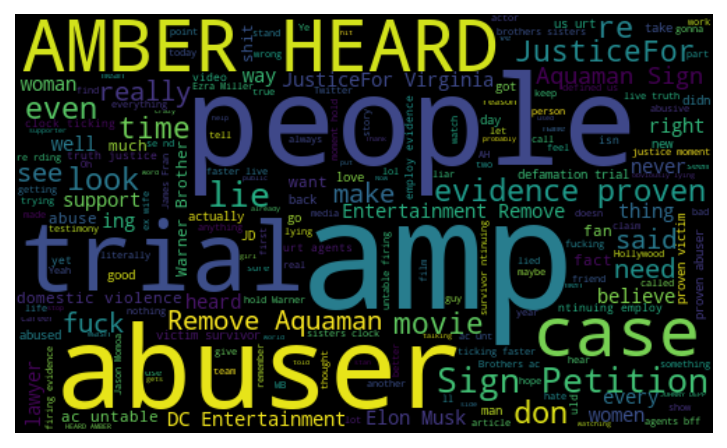

In [ ]:
def cleanTwt2(twt):
  twt = re.sub(r'Johnny Depp', ' ', twt)
  twt = re.sub(r'JohnnyDepp', ' ', twt)
  twt = re.sub(r'johnny depp', ' ', twt)
  twt = re.sub(r'Johnny', ' ', twt)   
  twt = re.sub(r'johnny', ' ', twt) 
  twt = re.sub(r'Depp', ' ', twt) 
  twt = re.sub(r'Amber Heard', ' ', twt)
  twt = re.sub(r'amber heard', ' ', twt)
  twt = re.sub(r'Amber heard', ' ', twt)
  twt = re.sub(r'Amber Heard ', ' ', twt)
  twt = re.sub(r'Amber', ' ', twt)
  twt = re.sub(r'Heard', ' ', twt)
  twt = re.sub(r'will', ' ', twt)
  twt = re.sub(r'still', ' ', twt)
  twt = re.sub(r'know', ' ', twt)
  twt = re.sub(r'via', ' ', twt)
  twt = re.sub(r'one', ' ', twt)
  twt = re.sub(r'think', ' ', twt)
  twt = re.sub(r'going', ' ', twt)
  twt = re.sub(r'co', ' ', twt)
  twt = re.sub(r'say', ' ', twt)
  twt = re.sub(r'now', ' ', twt)

  return twt


df_tweet['word_cloud'] = df_tweet['cleaned_tweet'].apply(cleanTwt2)

allWords = ' '.join([twts for twts in df_tweet['word_cloud']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)
plt.rcParams["figure.dpi"] = (150)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()